In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv(r"D:\昱呈專用資料夾\程式語言\pythoon\第四階\3.深度學習使用Keras工作坊(The Deep Learning with Keras Workshop)\TensorFlow-Developer-Certificate-Guide-main\Chapter 12\sales_data.csv")
data.head()

,Date,Sales
0,2013-01-01,48.40
1,2013-01-02,49.63
2,2013-01-03,44.66
3,2013-01-04,56.70
4,2013-01-05,62.87


In [3]:
#數據綜覽
print(data.dtypes)
print("-----------")
print(data.describe())

Date      object
Sales    float64
dtype: object
-----------
             Sales
count  3653.000000
mean     75.139261
std      20.656918
min      18.800000
25%      59.930000
50%      75.240000
75%      89.780000
max     127.060000


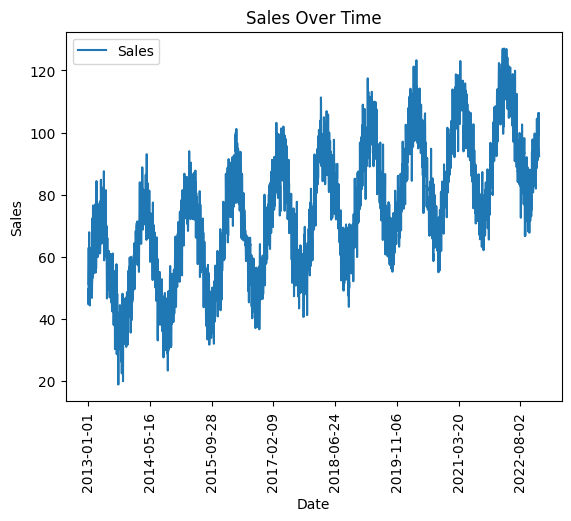

In [4]:
#視覺化
data.set_index('Date').plot()
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.show()

In [5]:
#分割訓練、驗證資料
split_time = int(len(data)*0.8)
time = np.arange(len(data))
x_train = data['Sales'][:split_time]
x_valid = data['Sales'][split_time:]
time_train = time[:split_time]
time_valid = time[split_time:]


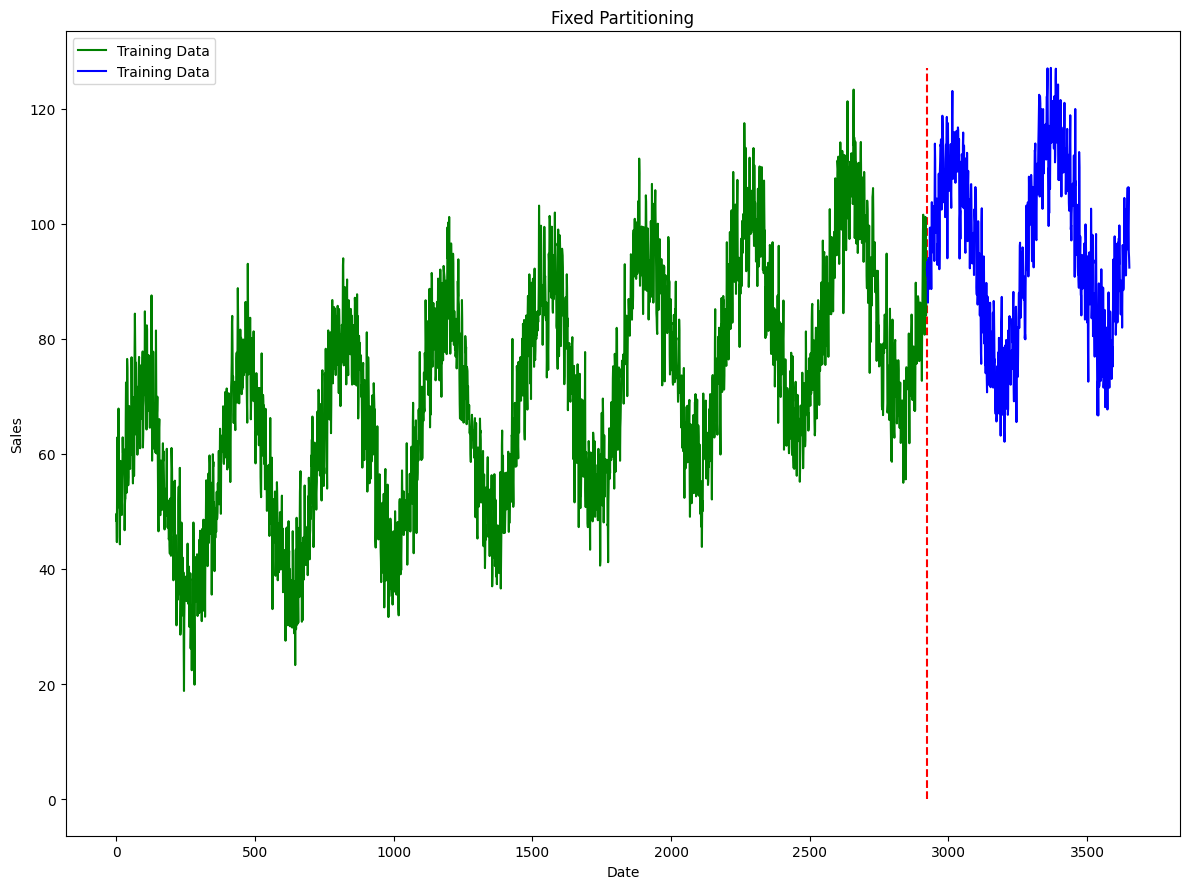

In [6]:
#視覺化
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(time_train,x_train,'green',label = 'Training Data')
ax.plot(time_valid,x_valid,'blue',label = 'Training Data')
ax.set_title('Fixed Partitioning')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
all_dates = np.concatenate([time_train,time_valid])
ax.vlines(data.index[split_time], ymin=0, ymax=data['Sales'].max(), colors='r', linestyles='--')
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
##naive forecast
data['Naive_Forecast'] = data['Sales'].shift(1)
data.head()

,Date,Sales,Naive_Forecast
0,2013-01-01,48.40,NaN
1,2013-01-02,49.63,48.40
2,2013-01-03,44.66,49.63
3,2013-01-04,56.70,44.66
4,2013-01-05,62.87,56.70


In [8]:
#定義naive forecast函數
def plot_forecast(time, x_valid, forecast, title, start_date=None, end_date=None):
    plt.figure(figsize=(10, 6))
    plt.plot(time, x_valid, label="True Values")
    plt.plot(time, forecast, label=title)

    if start_date and end_date:#日期轉換計算
        start_index = data[data["Date"] == start_date].index[0]
        end_index = data[data["Date"] == end_date].index[0]
        tick_frequency = (end_index - start_index) // 10
        tick_indices = list(range(start_index, end_index, tick_frequency))
        tick_labels = [data['Date'].iloc[i] for i in tick_indices]
        plt.xticks(tick_indices, tick_labels, rotation=90)
        plt.xlim(start_index, end_index)

    plt.title(f"Validation Split: True Values vs {title}")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


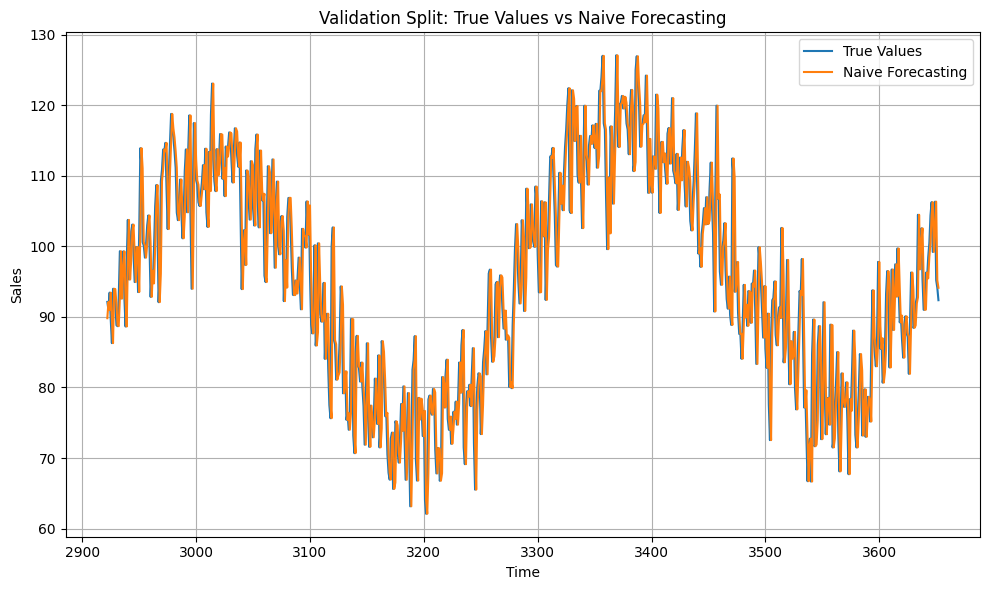

In [9]:
plot_forecast(time_valid,x_valid, data['Naive_Forecast'][split_time:],'Naive Forecasting')

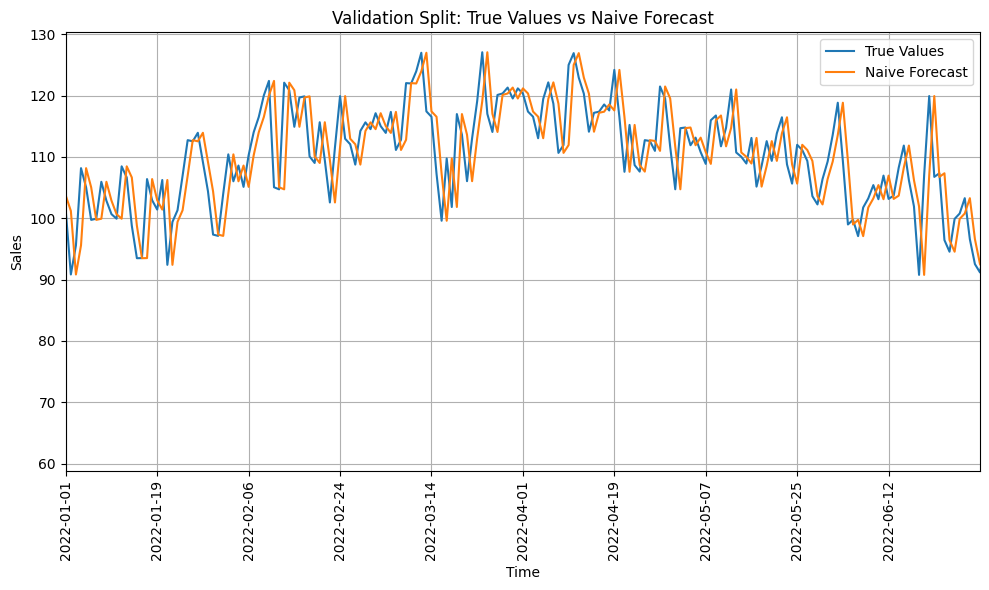

In [10]:
#預測
plot_forecast(time_valid,x_valid,data['Naive_Forecast'][split_time:],"Naive Forecast",'2022-01-01','2022-06-30')

In [11]:
#Naive Forecasting指標
mse = tf.keras.metrics.mean_squared_error(x_valid, data['Naive_Forecast'][split_time:]).numpy()
print('Mean Squared Error:', mse)

mae = tf.keras.metrics.mean_absolute_error(x_valid,data['Naive_Forecast'][split_time:]).numpy()
print('Mean Absolute Error:', mae)

Mean Squared Error: 38.193970588235295
Mean Absolute Error: 4.874322845417236


In [17]:
##Moving average 
#設定5天作為平均計算天數
window =5
data['Moving_Average_Forecast'] = data['Sales'].rolling(window).mean().shift(1)
print(data[:10])

         Date  Sales  Naive_Forecast  Moving_Average_Forecast
0  2013-01-01  48.40             NaN                      NaN
1  2013-01-02  49.63           48.40                      NaN
2  2013-01-03  44.66           49.63                      NaN
3  2013-01-04  56.70           44.66                      NaN
4  2013-01-05  62.87           56.70                      NaN
5  2013-01-06  51.03           62.87                   52.452
6  2013-01-07  51.81           51.03                   52.978
7  2013-01-08  63.24           51.81                   53.414
8  2013-01-09  67.87           63.24                   57.130
9  2013-01-10  58.20           67.87                   59.364


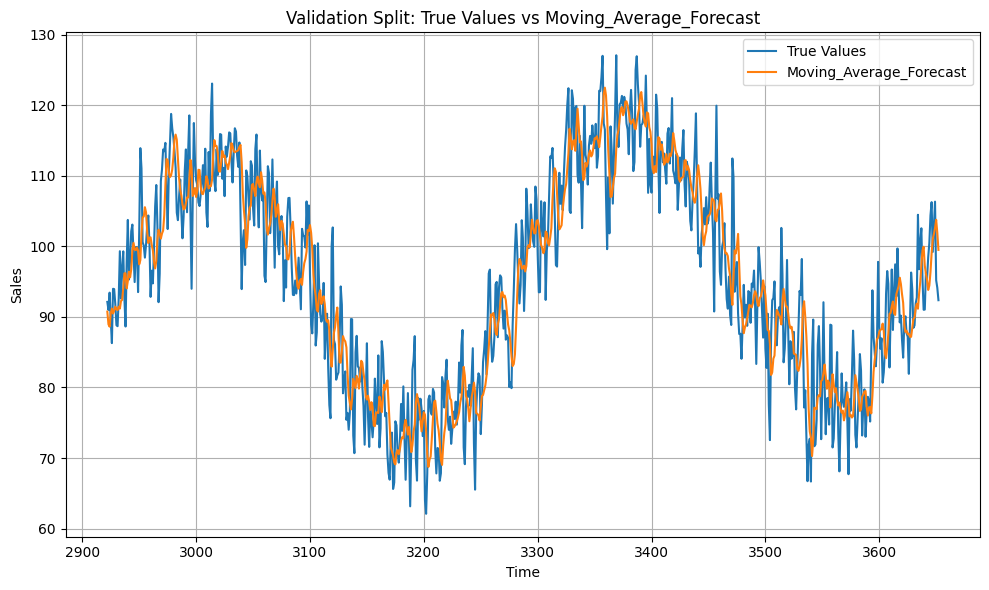

In [13]:
#預測
plot_forecast(time_valid,x_valid,data['Moving_Average_Forecast'][split_time:],'Moving_Average_Forecast')

In [14]:
#Moving average指標
mse = tf.keras.metrics.mean_squared_error(x_valid, data['Moving_Average_Forecast'][split_time:]).numpy()
print('Mean Squared Error:', mse)

mae = tf.keras.metrics.mean_absolute_error(x_valid,data['Moving_Average_Forecast'][split_time:]).numpy()
print('Mean Absolute Error:', mae)

Mean Squared Error: 40.72356984404925
Mean Absolute Error: 5.117671682626539


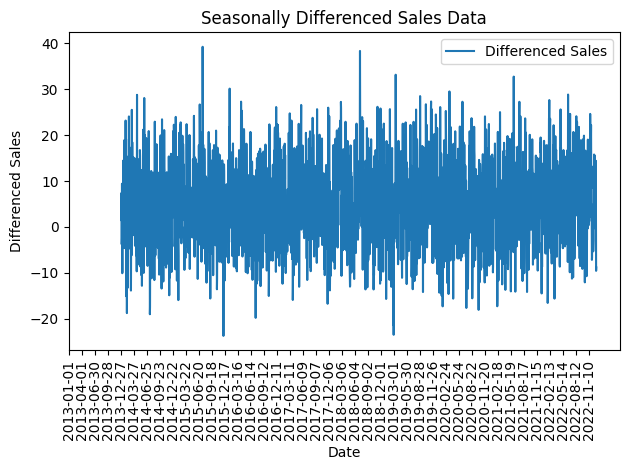

In [22]:
#差分操作
data['Differenced_Sales']=data['Sales'].diff(365)
#畫圖
plt.plot(data['Date'], data['Differenced_Sales'],label = 'Differenced Sales')
plt.title('Seasonally Differenced Sales Data')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
all_dates = data['Date']
plt.xticks(all_dates[::90], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
#將差分恢復季節性
data['Restored_Sales'] = data['Sales'].shift(365) + data['Differenced_Sales']
#計算移動平均
data['Restored_Moving_Average_Forecast'] = data['Restored_Sales'].rolling(window=window).mean().shift(1)
print(data)

            Date   Sales  Naive_Forecast  Moving_Average_Forecast  \
0     2013-01-01   48.40             NaN                      NaN   
1     2013-01-02   49.63           48.40                      NaN   
2     2013-01-03   44.66           49.63                      NaN   
3     2013-01-04   56.70           44.66                      NaN   
4     2013-01-05   62.87           56.70                      NaN   
...          ...     ...             ...                      ...   
3648  2022-12-28  102.61           99.20                  101.742   
3649  2022-12-29  106.32          102.61                  102.572   
3650  2022-12-30   95.19          106.32                  103.750   
3651  2022-12-31   94.12           95.19                  101.914   
3652  2023-01-01   92.36           94.12                   99.488   

      Differenced_Sales  Restored_Sales  Restored_Moving_Average_Forecast  
0                   NaN             NaN                               NaN  
1                  

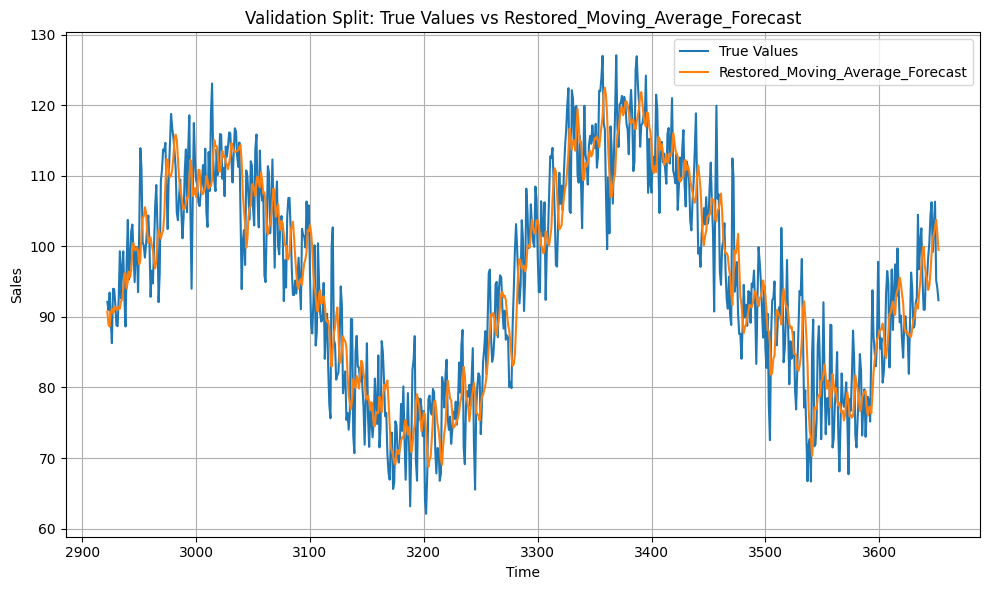

In [30]:
#畫圖、預測
plot_forecast(time_valid,x_valid,data['Restored_Moving_Average_Forecast'][split_time:],'Restored_Moving_Average_Forecast')

In [31]:
#Restored_Moving_Average_Forecast指標
mse = tf.keras.metrics.mean_squared_error(x_valid, data['Restored_Moving_Average_Forecast'][split_time:]).numpy()
print('Mean Squared Error:', mse)

mae = tf.keras.metrics.mean_absolute_error(x_valid,data['Restored_Moving_Average_Forecast'][split_time:]).numpy()
print('Mean Absolute Error:', mae)

Mean Squared Error: 40.72356984404925
Mean Absolute Error: 5.117671682626539
